In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from tqdm import tqdm

In [82]:
df=pd.read_csv("questions.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [83]:
df.shape

(404351, 6)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [85]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


In [86]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
315323,315323,618804,618805,Why is standard of Quora questions decreasing?,Why is the standard of questions asked on Quor...,1
209155,209155,412579,9311,What type business is we should to be start?,What type of business should I start?,1
271087,271087,533160,533161,What is a Palanca letter and how do you write ...,How does one write a Christmas letter?,0
72089,72089,143267,143268,Should IT companies be taxed for gathering data?,How do job boards make any money from multi po...,0
368911,368911,721979,721980,Should I join event management courses?,Can I do event management course?,0
285189,285189,560496,560497,Can India ban Chinese manufactured goods?,Why doesn't India ban the import of Chinese go...,1
369721,369721,723527,723528,How do I handle trust issues?,How can I fix my trust issues?,1
195567,195567,386007,386008,Does science have any evidence that parallel u...,Does parallel universe exist? What are the con...,1
182648,182648,360731,360732,What are home remedy for erectile dysfunction?,What are some home remedies for erectile dysfu...,1
129782,129782,257065,257066,What are the courses available after B. Com?,Which courses after passing b.com?,0


In [87]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [88]:
df.dropna(inplace=True)

In [89]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [90]:
df.is_duplicate.sum()

np.int64(149306)

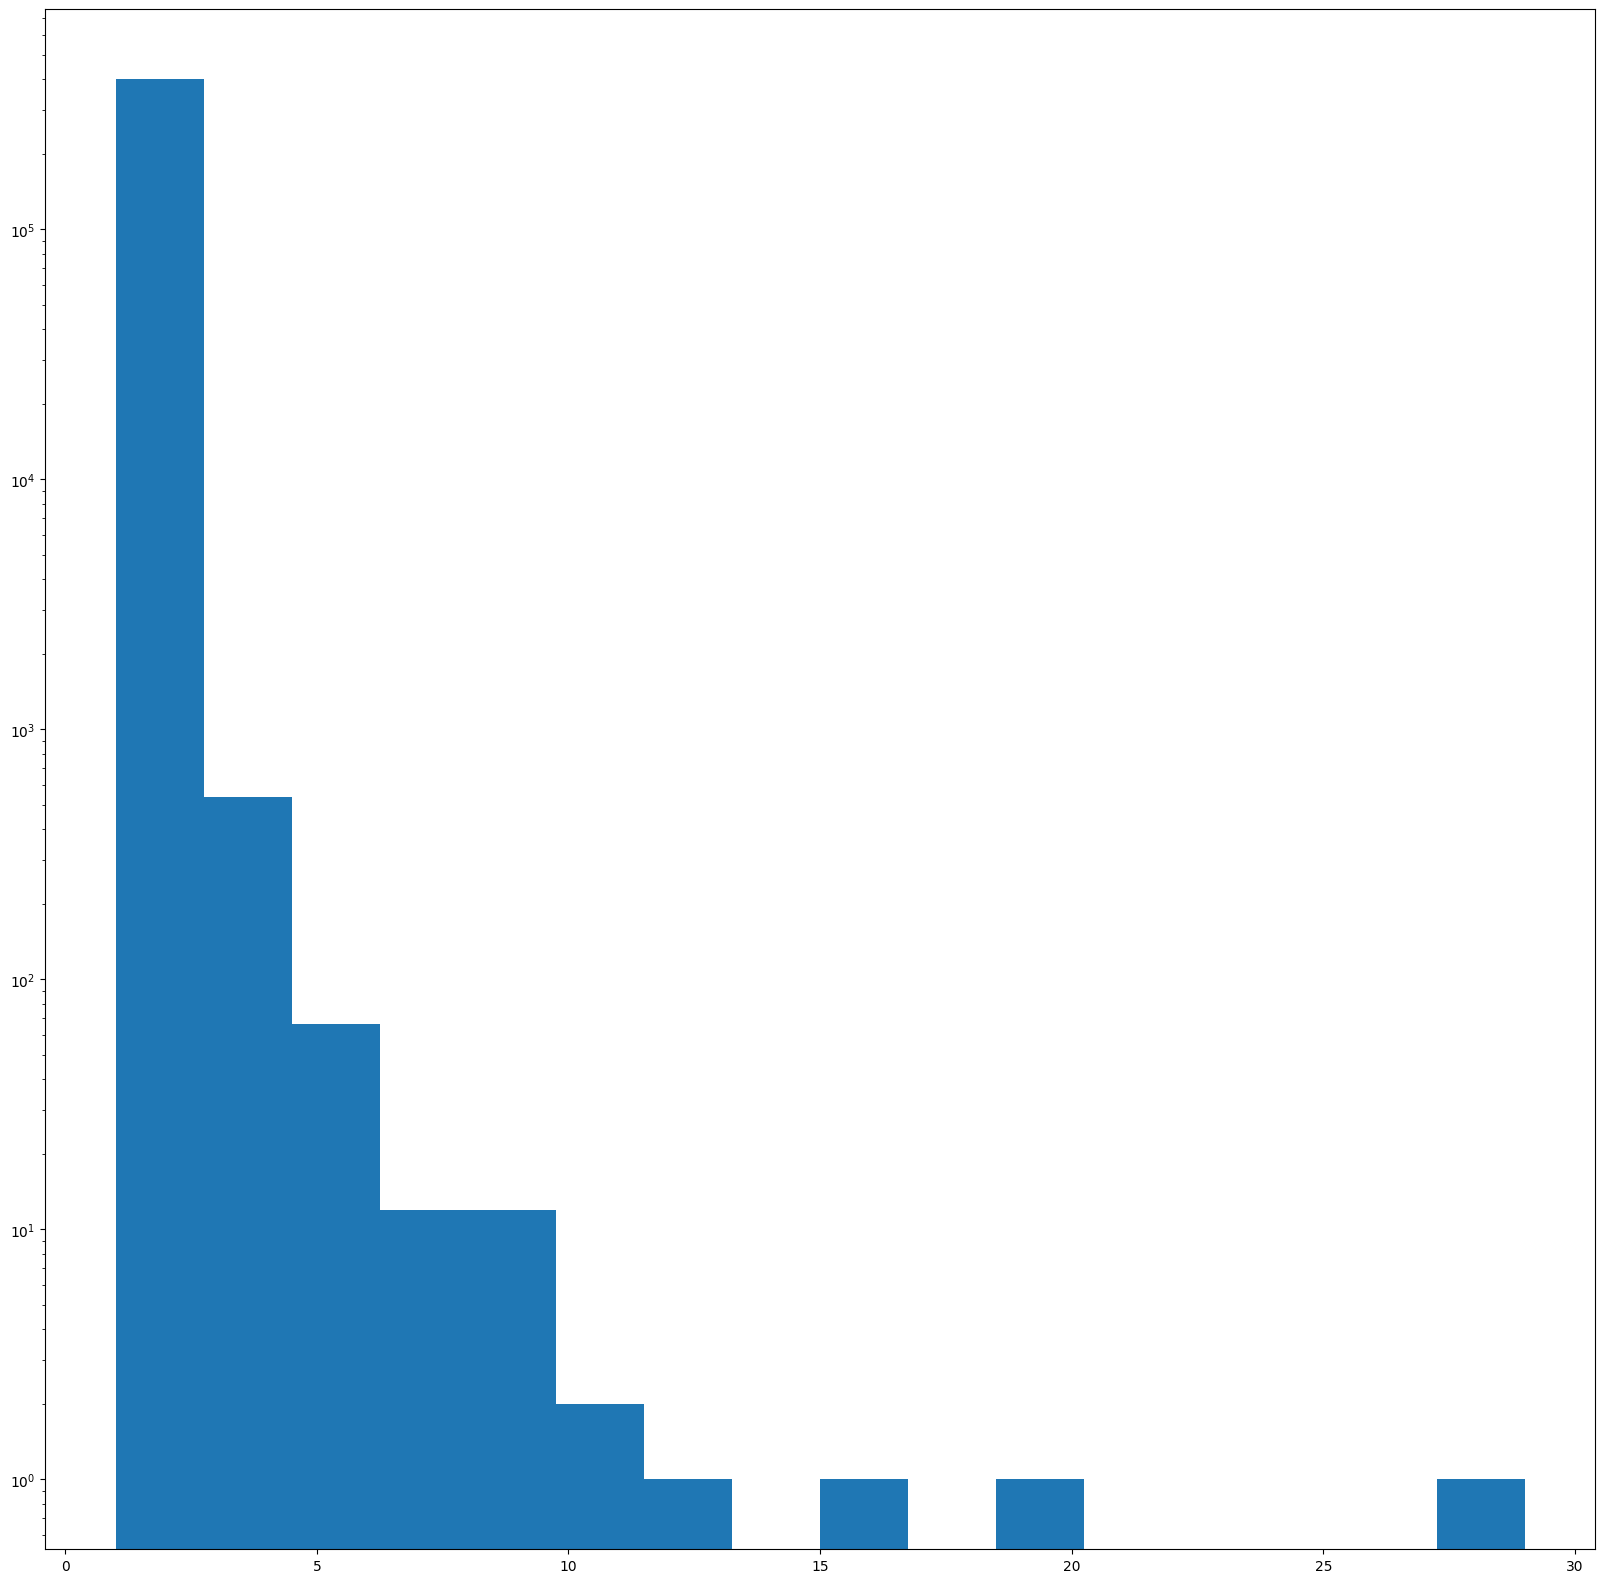

In [91]:
plt.figure(figsize=(20,20))
plt.hist(df["qid1"].value_counts(),bins=16)

plt.yscale('log')
plt.show()

In [92]:
df["is_duplicate"].unique()

array([0, 1])

In [93]:
df["is_duplicate"].value_counts()

,count
is_duplicate,
0,255042
1,149306


Text(0, 0.5, 'Number of pairs')

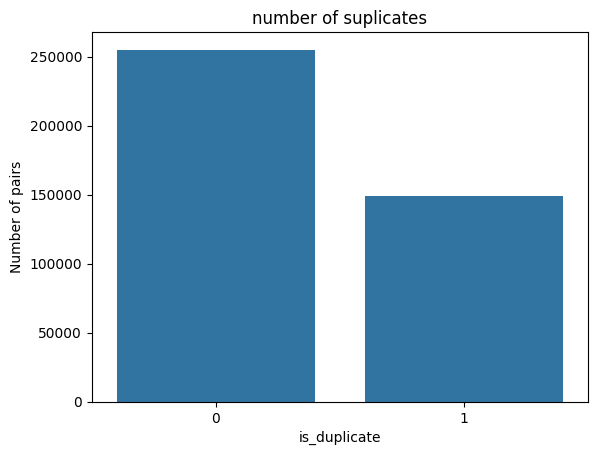

In [94]:
sns.countplot(x='is_duplicate',data=df)
plt.title('number of suplicates')
plt.ylabel("Number of pairs")


In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
print("Percentage distibution")
(df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100

Percentage distibution


,count
is_duplicate,
0,63.074876
1,36.925124


In [97]:
import plotly.express as px

In [98]:
counts = df["is_duplicate"].value_counts()
labels = {0: "Not Duplicate", 1: "Duplicate"}

fig = px.pie(
    values=counts.values,
    names=[labels[i] for i in counts.index],
    title="Duplicate vs Non-Duplicate Distribution",
    hole=.3
)

fig.show()


In [99]:
total_questions=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
print("total_questions=",total_questions.count())
print("Unique questions",np.unique(total_questions).shape[0])

total_questions= 808696
Unique questions 789795


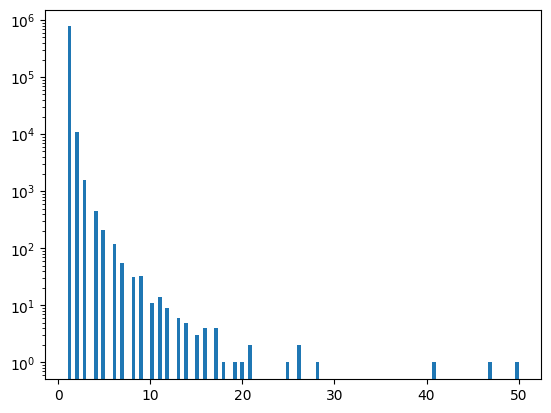

In [100]:
plt.hist(total_questions.value_counts(),bins=120)
plt.yscale('log')
plt.show()

In [101]:
df=df.sample(30000)

In [102]:
total_questions=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
print("total_questions=",total_questions.count())

total_questions= 60000


In [103]:
print("Unique questions",np.unique(total_questions).shape[0])

Unique questions 59850


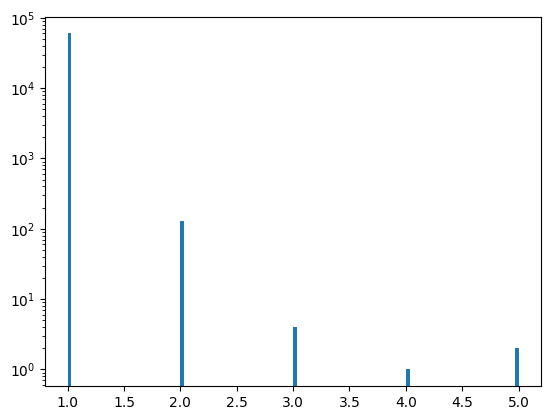

In [104]:
plt.hist(total_questions.value_counts(),bins=120)
plt.yscale('log')
plt.show()

In [105]:
ques=df[["question1","question2"]]
ques.head()

,question1,question2
47003,What is quantum numbers in short?,What is a quantum number?
126223,Linear Function Application maths question. Help?,Linear Function Applications Maths Question. H...
182118,Where is protoplasm in a cell? What purpose do...,What is protoplasm? What purpose does it serve?
154246,What is your personal favourite song and why?,What is your favorite song of all time and why?
94712,How do you restore a Dell Inspiron 1525 to the...,How do I restore my Dell computer to factory s...


In [106]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
cv.fit(pd.concat([ques["question1"], ques["question2"]]))



CountVectorizer(max_features=3000)

In [107]:
q1_arr = cv.transform(ques["question1"]).toarray()
q2_arr = cv.transform(ques["question2"]).toarray()

temp_df = pd.concat([
    pd.DataFrame(q1_arr, index=ques.index),
    pd.DataFrame(q2_arr, index=ques.index)
], axis=1)

temp_df.shape

(30000, 6000)

In [108]:
temp_df["is_duplicate"]=df["is_duplicate"]


In [108]:
temp_df

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [116]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.7178333333333333

In [123]:
from xgboost import XGBClassifier

In [124]:

xgb=XGBClassifier(n_estimators=100,learning_rate=0.05)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [126]:
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.689